#  ----------------Hidden Markov Model for Stock Selection------------------------

In [1]:
import warnings
warnings.filterwarnings("ignore")

### 1. Downloading Data

In [2]:
import pandas as pd
SPYprice = pd.read_csv("SPYTrain.csv")
SPYtest = pd.read_csv("SPYTest.csv")
VIXprice = pd.read_csv("VIXTrain.csv")
VIXtest = pd.read_csv("VIXTest.csv")
INDPROprice = pd.read_csv("INDPROTrain.csv")
INDPROtest = pd.read_csv("INDPROTest.csv")
CPIprice = pd.read_csv("CPITrain.csv")
CPItest = pd.read_csv("CPITest.csv")
EP = pd.read_csv("EP.csv")
FCF = pd.read_csv("FCF.csv")
SEV = pd.read_csv("SEV.csv")
SP500 = pd.read_csv("SP500.csv")

In [3]:
from hmmlearn.hmm import GaussianHMM

In [4]:
SPYprice.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,Jan-90,353.399994,360.589996,319.829987,329.079987,329.079987,3.793250e+09
1,Feb-90,329.079987,336.089996,322.100006,331.890015,331.890015,2.961970e+09
2,Mar-90,331.890015,344.489990,331.079987,339.940002,339.940002,3.283280e+09
3,Apr-90,339.940002,347.299988,327.760010,330.799988,330.799988,2.801220e+09
4,May-90,330.799988,362.260010,330.799988,361.230011,361.230011,3.596680e+09


In [5]:
VIXprice.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/1/90,17.240000,27.250000,17.240000,25.360001,25.360001,0
1,2/1/90,24.870001,24.870001,19.709999,21.990000,21.990000,0
2,3/1/90,21.900000,22.740000,17.620001,19.730000,19.730000,0
3,4/1/90,22.840000,24.160000,17.730000,19.520000,19.520000,0
4,5/1/90,18.430000,20.139999,16.719999,17.370001,17.370001,0


In [6]:
INDPROprice.head()

,DATE,INDPRO
0,1/1/90,63.7117
1,2/1/90,64.3504
2,3/1/90,64.6721
3,4/1/90,64.5975
4,5/1/90,64.7028


In [7]:
CPIprice.head()

,DATE,CPI
0,1/1/90,127.5
1,2/1/90,128.0
2,3/1/90,128.6
3,4/1/90,128.9
4,5/1/90,129.1


In [8]:
import numpy as np
SPY = pd.DataFrame()
VIX = pd.DataFrame()
INDPRO = pd.DataFrame()
CPI = pd.DataFrame()
SPY['Returns'] = SPYprice['Adj Close'].diff(1)
SPY['logReturns'] = np.log(SPYprice['Adj Close'].diff(1))
SPYtest['Returns'] = SPYtest['Adj Close'].diff(1)
SPYtest['logReturns'] = np.log(SPYtest['Adj Close'].diff(1))
VIX['Returns'] = VIXprice['Adj Close'].diff(1)
VIX['logReturns'] = np.log(VIXprice['Adj Close'].diff(1))
VIXtest['Returns'] = VIXtest['Adj Close'].diff(1)
VIXtest['logReturns'] = np.log(VIXtest['Adj Close'].diff(1))
INDPRO['Returns'] = INDPROprice['INDPRO'].diff(1)
INDPRO['logReturns'] = np.log(INDPROprice['INDPRO'].diff(1))
INDPROtest['Returns'] = INDPROtest['INDPRO'].diff(1)
INDPROtest['logReturns'] = np.log(INDPROtest['INDPRO'].diff(1))
CPI['Returns'] = CPIprice['CPI'].diff(1)
CPI['logReturns'] = np.log(CPIprice['CPI'].diff(1))
CPItest['Returns'] = CPItest['CPI'].diff(1)
CPItest['logReturns'] = np.log(CPItest['CPI'].diff(1))

In [9]:
SPY = pd.concat([SPY['Returns'],SPY['logReturns']],axis=1)
SPY = SPY.fillna(0)
SPYtest = pd.concat([SPYtest['Returns'],SPYtest['logReturns']],axis=1)
SPYtest = SPYtest.fillna(0)
VIX = pd.concat([VIX['Returns'],VIX['logReturns']],axis=1)
VIX = VIX.fillna(0)
VIXtest = pd.concat([VIXtest['Returns'],VIXtest['logReturns']],axis=1)
VIXtest = VIXtest.fillna(0)
INDPRO = pd.concat([INDPRO['Returns'],INDPRO['logReturns']],axis=1)
INDPRO = INDPRO.fillna(0)
INDPROtest = pd.concat([INDPROtest['Returns'],INDPROtest['logReturns']],axis=1)
INDPROtest = INDPROtest.fillna(0)
CPI = pd.concat([CPI['Returns'],CPI['logReturns']],axis=1)
CPI = CPI.replace([np.inf,-np.inf],np.nan)
CPI = CPI.fillna(0)
CPItest = pd.concat([CPItest['Returns'],CPItest['logReturns']],axis=1)
CPItest = CPItest.replace([np.inf,-np.inf],np.nan)
CPItest = CPItest.fillna(0)

### 2. Applying hidden Markov model

In [10]:
modelSPY = GaussianHMM(n_components=2, n_iter=1000).fit(SPY)
modelVIX = GaussianHMM(n_components=2, n_iter=1000).fit(VIX)
modelINDPRO = GaussianHMM(n_components=2, n_iter=1000).fit(INDPRO)
modelCPI = GaussianHMM(n_components=2, n_iter=1000).fit(CPI)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/anaconda3/lib/python3.6/site-pac

In [11]:
hidden_statesSPY = modelSPY.predict(SPY)
hidden_statesVIX = modelVIX.predict(VIX)
hidden_statesINDPRO = modelINDPRO.predict(INDPRO)
hidden_statesCPI = modelCPI.predict(CPI)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.p

In [12]:
regimesSPY = modelSPY.predict(SPY)
regimesVIX = modelVIX.predict(VIX)
regimesINDPRO = modelINDPRO.predict(INDPRO)
regimesCPI = modelCPI.predict(CPI)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.p

### 3. Displaying the results of different market regimes for all four macroeconomic variables

In [13]:
print("Transition matrix for SPY")
print(modelSPY.transmat_)
print()

print("Means and vars of each hidden state in SPY")
for i in range(modelSPY.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", modelSPY.means_[i])
    print("var = ", np.diag(modelSPY.covars_[i]))
    print()
    
print("Transition matrix for VIX")
print(modelVIX.transmat_)
print()

print("Means and vars of each hidden state in VIX")
for i in range(modelVIX.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", modelVIX.means_[i])
    print("var = ", np.diag(modelVIX.covars_[i]))
    print()
    
print("Transition matrix for INDPRO")
print(modelINDPRO.transmat_)
print()

print("Means and vars of each hidden state in INDPRO")
for i in range(modelINDPRO.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", modelINDPRO.means_[i])
    print("var = ", np.diag(modelINDPRO.covars_[i]))
    print()
    
print("Transition matrix for CPI")
print(modelCPI.transmat_)
print()

print("Means and vars of each hidden state in CPI")
for i in range(modelCPI.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", modelCPI.means_[i])
    print("var = ", np.diag(modelCPI.covars_[i]))
    print()

Transition matrix for SPY
[[0.62182224 0.37817776]
 [0.63343352 0.36656648]]

Means and vars of each hidden state in SPY
0th hidden state
mean =  [27.74416722  2.78517667]
var =  [600.50479153   1.66361317]

1th hidden state
mean =  [-3.74425025e+01 -1.17353860e-32]
var =  [1.45711506e+03 1.11158371e-04]

Transition matrix for VIX
[[0.82433234 0.17566766]
 [0.75856879 0.24143121]]

Means and vars of each hidden state in VIX
0th hidden state
mean =  [-1.01653441 -0.10680521]
var =  [5.40127427 0.55168095]

1th hidden state
mean =  [4.39374516 1.44967164]
var =  [41.46955217  0.52849771]

Transition matrix for INDPRO
[[0.71247845 0.28752155]
 [0.52980601 0.47019399]]

Means and vars of each hidden state in INDPRO
0th hidden state
mean =  [ 0.41995691 -1.25878918]
var =  [0.09242659 1.23389088]

1th hidden state
mean =  [-4.4881608e-01  2.7373658e-05]
var =  [4.27692168e-01 1.24991992e-04]

Transition matrix for CPI
[[0.75226175 0.24773825]
 [0.40029785 0.59970215]]

Means and vars of eac

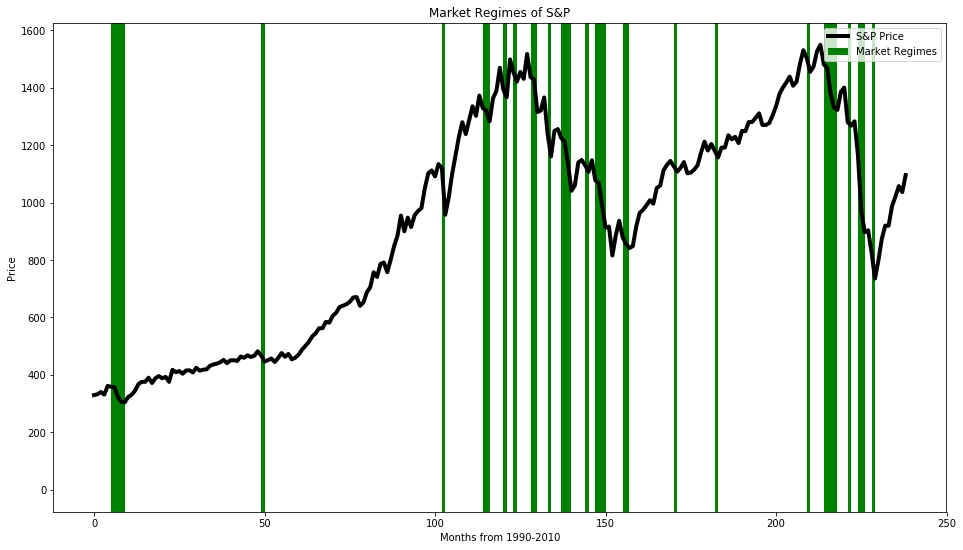

In [14]:
regimesSPY = pd.DataFrame(regimesSPY)
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(SPYprice['Adj Close'], color = 'black', label = 'S&P Price', linewidth = 4)
ax.fill_between(regimesSPY.index,0,1,where = regimesSPY[0],transform=ax.get_xaxis_transform(), facecolor ='green', label = 'Market Regimes')
plt.xlabel('Months from 1990-2010')
plt.ylabel('Price')
plt.legend(loc='best')
plt.title('Market Regimes of S&P')
plt.show()

In [15]:
regimesSPY = regimesSPY[0].values.tolist()

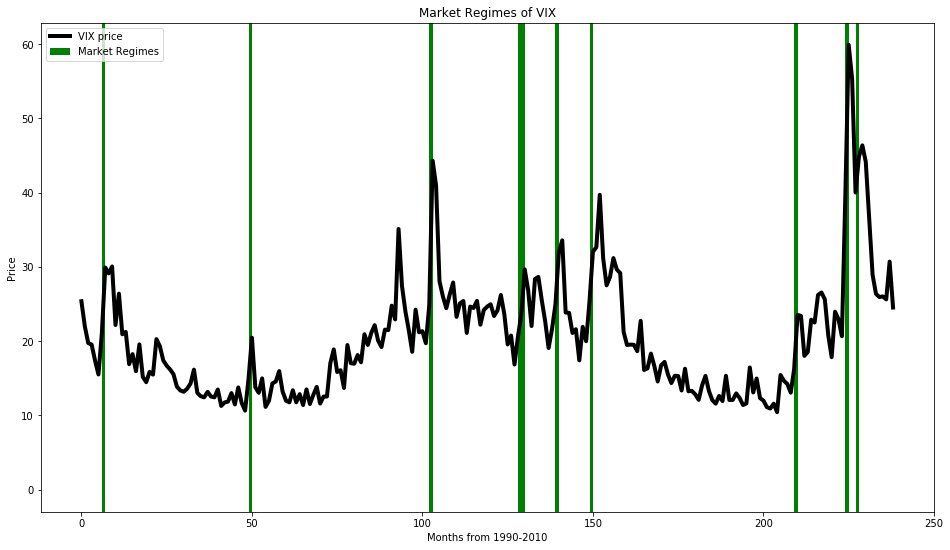

In [16]:
regimesVIX = pd.DataFrame(regimesVIX)
%matplotlib inline
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(VIXprice['Adj Close'], color = 'black', label = 'VIX price', linewidth = 4)
ax.fill_between(regimesVIX.index,0,1,where = regimesVIX[0],transform=ax.get_xaxis_transform(), facecolor = 'green', label = 'Market Regimes')
plt.xlabel('Months from 1990-2010')
plt.ylabel('Price')
plt.legend(loc='best')
plt.title('Market Regimes of VIX')
plt.show()

In [17]:
regimesVIX = regimesVIX[0].values.tolist()

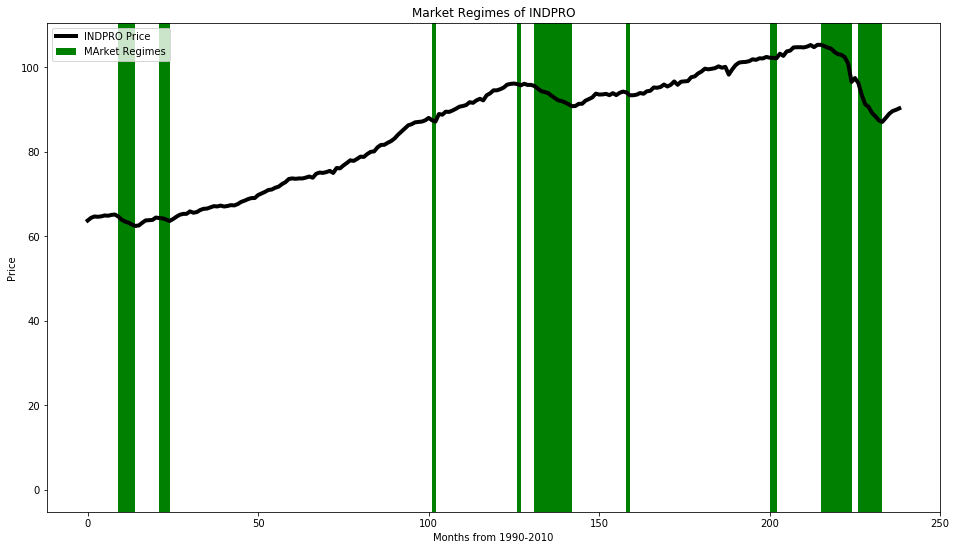

In [18]:
regimesINDPRO = pd.DataFrame(regimesINDPRO)
%matplotlib inline
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(INDPROprice['INDPRO'], color = 'black', label = 'INDPRO Price', linewidth = 4)
ax.fill_between(regimesINDPRO.index,0,1,where = regimesINDPRO[0],transform=ax.get_xaxis_transform(), facecolor = 'green', label = 'MArket Regimes')
plt.xlabel('Months from 1990-2010')
plt.ylabel('Price')
plt.legend(loc='best')
plt.title('Market Regimes of INDPRO')
plt.show()

In [19]:
regimesINDPRO = regimesINDPRO[0].values.tolist()

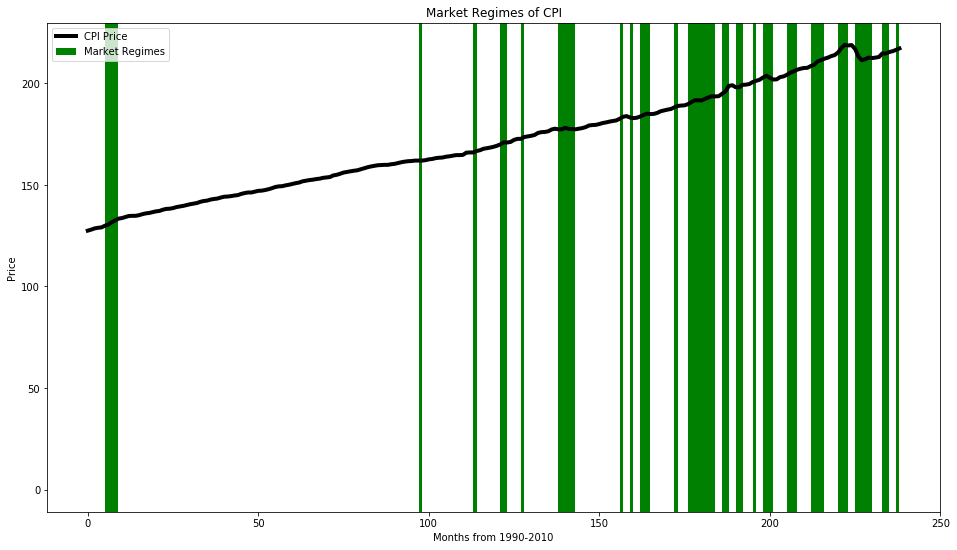

In [20]:
regimesCPI = pd.DataFrame(regimesCPI)
%matplotlib inline
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(CPIprice['CPI'], color = 'black', label = 'CPI Price', linewidth = 4)
ax.fill_between(regimesCPI.index,0,1,where = regimesCPI[0],transform=ax.get_xaxis_transform(), facecolor = 'green', label = 'Market Regimes')
plt.xlabel('Months from 1990-2010')
plt.ylabel('Price')
plt.legend(loc='best')
plt.title('Market Regimes of CPI')
plt.show()

In [21]:
regimesCPI = regimesCPI[0].values.tolist()

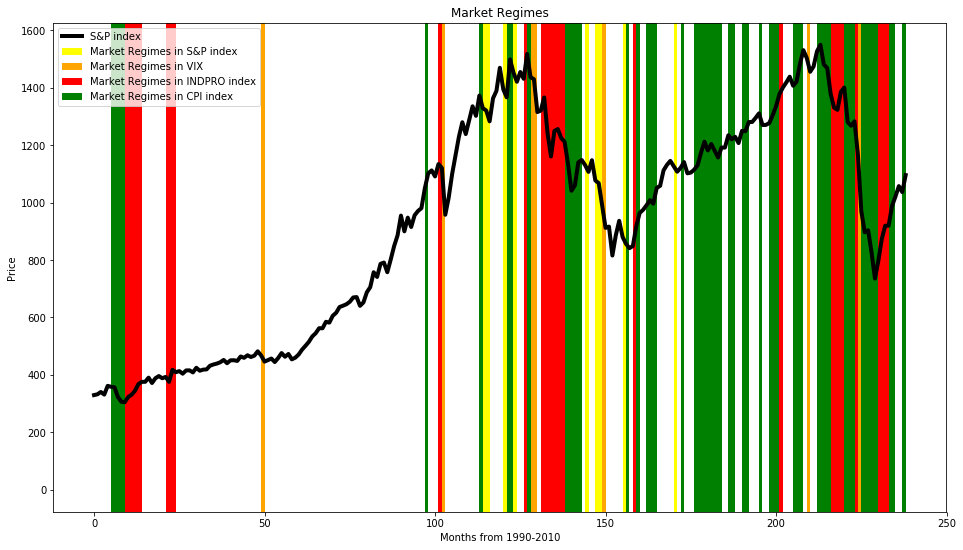

In [22]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(SPYprice['Adj Close'], color = 'black', label = 'S&P index', linewidth = 4)
regimesSPY = pd.DataFrame(regimesSPY)
ax.fill_between(regimesSPY.index,0,1,where = regimesSPY[0],transform=ax.get_xaxis_transform(), facecolor ='yellow', label = 'Market Regimes in S&P index')
regimesVIX = pd.DataFrame(regimesVIX)
ax.fill_between(regimesVIX.index,0,1,where = regimesVIX[0],transform=ax.get_xaxis_transform(), facecolor = 'orange', label = 'Market Regimes in VIX')
regimesINDPRO = pd.DataFrame(regimesINDPRO)
ax.fill_between(regimesINDPRO.index,0,1,where = regimesINDPRO[0],transform=ax.get_xaxis_transform(), facecolor = 'red', label = 'Market Regimes in INDPRO index')
regimesCPI = pd.DataFrame(regimesCPI)
ax.fill_between(regimesCPI.index,0,1,where = regimesCPI[0],transform=ax.get_xaxis_transform(), facecolor = 'green', label = 'Market Regimes in CPI index')
plt.xlabel('Months from 1990-2010')
plt.ylabel('Price')
plt.legend(loc='best')
plt.title('Market Regimes')
plt.show()

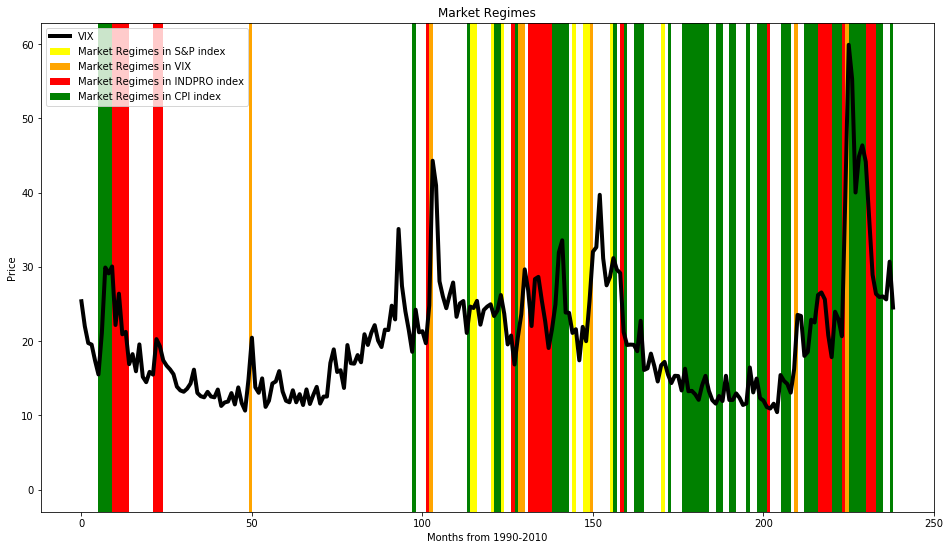

In [23]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(VIXprice['Adj Close'], color = 'black', label = 'VIX', linewidth = 4)
regimesSPY = pd.DataFrame(regimesSPY)
ax.fill_between(regimesSPY.index,0,1,where = regimesSPY[0],transform=ax.get_xaxis_transform(), facecolor ='yellow', label = 'Market Regimes in S&P index')
regimesVIX = pd.DataFrame(regimesVIX)
ax.fill_between(regimesVIX.index,0,1,where = regimesVIX[0],transform=ax.get_xaxis_transform(), facecolor = 'orange', label = 'Market Regimes in VIX')
regimesINDPRO = pd.DataFrame(regimesINDPRO)
ax.fill_between(regimesINDPRO.index,0,1,where = regimesINDPRO[0],transform=ax.get_xaxis_transform(), facecolor = 'red', label = 'Market Regimes in INDPRO index')
regimesCPI = pd.DataFrame(regimesCPI)
ax.fill_between(regimesCPI.index,0,1,where = regimesCPI[0],transform=ax.get_xaxis_transform(), facecolor = 'green', label = 'Market Regimes in CPI index')
plt.xlabel('Months from 1990-2010')
plt.ylabel('Price')
plt.legend(loc='best')
plt.title('Market Regimes')
plt.show()

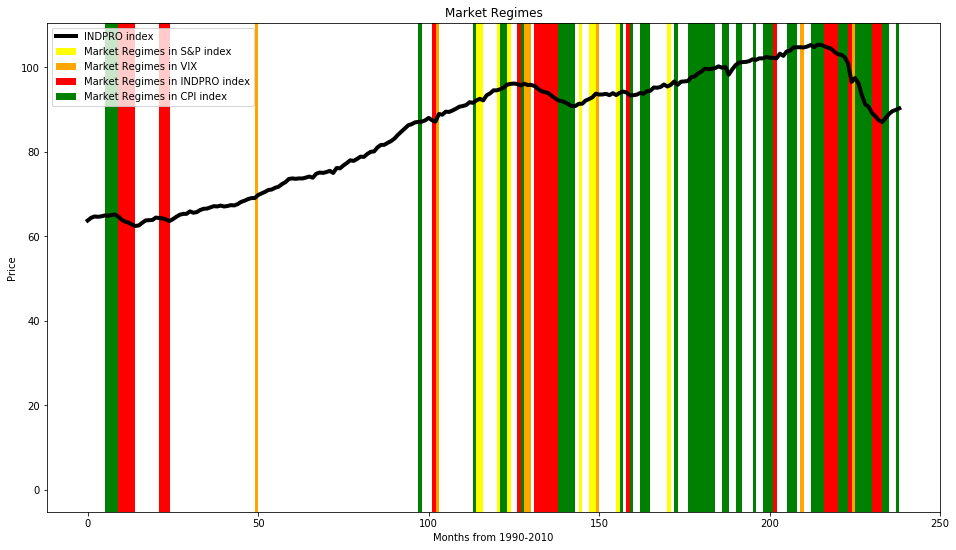

In [24]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(INDPROprice['INDPRO'], color = 'black', label = 'INDPRO index', linewidth = 4)
regimesSPY = pd.DataFrame(regimesSPY)
ax.fill_between(regimesSPY.index,0,1,where = regimesSPY[0],transform=ax.get_xaxis_transform(), facecolor ='yellow', label = 'Market Regimes in S&P index')
regimesVIX = pd.DataFrame(regimesVIX)
ax.fill_between(regimesVIX.index,0,1,where = regimesVIX[0],transform=ax.get_xaxis_transform(), facecolor = 'orange', label = 'Market Regimes in VIX')
regimesINDPRO = pd.DataFrame(regimesINDPRO)
ax.fill_between(regimesINDPRO.index,0,1,where = regimesINDPRO[0],transform=ax.get_xaxis_transform(), facecolor = 'red', label = 'Market Regimes in INDPRO index')
regimesCPI = pd.DataFrame(regimesCPI)
ax.fill_between(regimesCPI.index,0,1,where = regimesCPI[0],transform=ax.get_xaxis_transform(), facecolor = 'green', label = 'Market Regimes in CPI index')
plt.xlabel('Months from 1990-2010')
plt.ylabel('Price')
plt.legend(loc='best')
plt.title('Market Regimes')
plt.show()

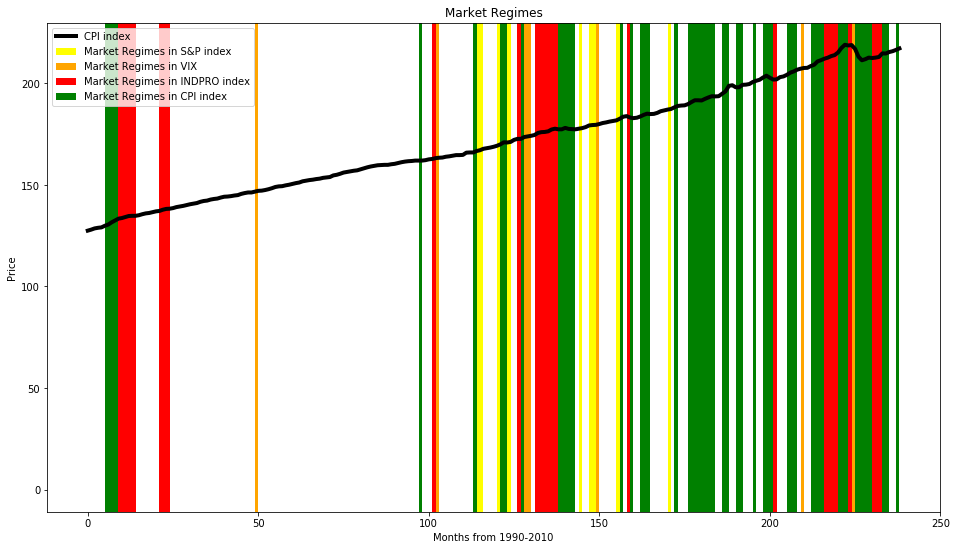

In [25]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(CPIprice['CPI'], color = 'black', label = 'CPI index', linewidth = 4)
regimesSPY = pd.DataFrame(regimesSPY)
ax.fill_between(regimesSPY.index,0,1,where = regimesSPY[0],transform=ax.get_xaxis_transform(), facecolor ='yellow', label = 'Market Regimes in S&P index')
regimesVIX = pd.DataFrame(regimesVIX)
ax.fill_between(regimesVIX.index,0,1,where = regimesVIX[0],transform=ax.get_xaxis_transform(), facecolor = 'orange', label = 'Market Regimes in VIX')
regimesINDPRO = pd.DataFrame(regimesINDPRO)
ax.fill_between(regimesINDPRO.index,0,1,where = regimesINDPRO[0],transform=ax.get_xaxis_transform(), facecolor = 'red', label = 'Market Regimes in INDPRO index')
regimesCPI = pd.DataFrame(regimesCPI)
ax.fill_between(regimesCPI.index,0,1,where = regimesCPI[0],transform=ax.get_xaxis_transform(), facecolor = 'green', label = 'Market Regimes in CPI index')
plt.xlabel('Months from 1990-2010')
plt.ylabel('Price')
plt.legend(loc='best')
plt.title('Market Regimes')
plt.show()

In [26]:
regimesSPY = regimesSPY[0].values.tolist()
regimesVIX = regimesVIX[0].values.tolist()
regimesINDPRO = regimesINDPRO[0].values.tolist()
regimesCPI = regimesCPI[0].values.tolist()

In [27]:
SPYtest = modelSPY.decode(SPYtest)
VIXtest = modelVIX.decode(VIXtest)
INDPROtest = modelINDPRO.decode(INDPROtest)
CPItest = modelCPI.decode(CPItest)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.p

In [28]:
SPYtest = SPYtest[1]
VIXtest = VIXtest[1]
INDPROtest = INDPROtest[1]
CPItest = CPItest[1]

In [29]:
r = 2
e = 1.5
f =  1
s = 0.5

### 4. Assessing stock performance using different stock characteristics

In [30]:
EP           

,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,1/31/90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.058298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/28/90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.058143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/30/90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.050594,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4/30/90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.051713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5/31/90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.048750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6/29/90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.064752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7/31/90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.059759,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8/31/90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.070800,...,NaN,NaN,0.062000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9/28/90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.093158,...,NaN,NaN,0.063265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10/31/90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.073750,...,NaN,NaN,0.063104,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
EP = EP.fillna(0)

In [32]:
EP

,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,1/31/90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.058298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2/28/90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.058143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3/30/90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.050594,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,4/30/90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.051713,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,5/31/90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.048750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,6/29/90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.064752,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,7/31/90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.059759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,8/31/90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070800,...,0.000000,0.000000,0.062000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,9/28/90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.093158,...,0.000000,0.000000,0.063265,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,10/31/90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.073750,...,0.000000,0.000000,0.063104,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [33]:
Date = EP['Date']

In [34]:
EP = EP.drop(['Date'],axis=1)

In [35]:
val = 0
i = 0
for columns in EP:
    if columns != 'Date':
        EP['{0}'.format(columns)] = EP['{0}'.format(columns)].diff(1)
        EP = EP.fillna(0)
        vars()['EP_'+str(columns)] = EP['{0}'.format(columns)]

In [36]:
EP

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.000155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.007549,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.001118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.002963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.016002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.004993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070800,0.000000,...,0.000000,0.000000,0.002241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022358,0.000000,...,0.000000,0.000000,0.001265,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.019407,0.000000,...,0.000000,0.000000,-0.000161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [37]:
def EP_score(df):
    maxValue = max(df)
    minValue = min(df)
    interval = ((maxValue - minValue)/5)
    for i in range(len(df)):
        if df[i] == 0:
            df[i] = 0
        elif df[i] <= maxValue - 4*interval:
            df[i] = 1.0*e
        elif df[i] <= maxValue - 3*interval:
            df[i] = 2.0*e
        elif df[i] <= maxValue - 2*interval:
            df[i] = 3.0*e
        elif df[i] <= maxValue - interval:
            df[i] = 4.0*e
        elif df[i] > maxValue - interval:
            df[i] = 5.0*e
    return df

In [38]:
import time
tic=time.time()
for columns in EP:
    if columns != 'Date':
        vars()['EP_'+str(columns)] = EP_score(EP['{0}'.format(columns)])
toc=time.time()
print('Total time = ', toc-tic)

Total time =  12.030086040496826


In [39]:
EP

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.5,0.0,...,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,...,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0,...,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
FCF

,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,1/31/90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/28/90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/30/90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4/30/90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5/31/90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6/29/90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7/31/90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8/31/90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9/28/90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10/31/90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
FCF = FCF.fillna(0)

In [42]:
FCF

,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,1/31/90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,2/28/90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,3/30/90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,4/30/90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,5/31/90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
5,6/29/90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
6,7/31/90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
7,8/31/90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
8,9/28/90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
9,10/31/90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [43]:
Date = FCF['Date']

In [44]:
FCF = FCF.drop(['Date'],axis=1)

In [45]:
FCF

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [46]:
val = 0
i = 0
for columns in FCF:
    if columns != 'Date':
        FCF['{0}'.format(columns)] = FCF['{0}'.format(columns)].diff(1)
        FCF = FCF.fillna(0)
        vars()['EP_'+str(columns)] = FCF['{0}'.format(columns)]

In [47]:
FCF

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00
1,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00
2,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00
3,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00
4,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00
5,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00
6,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00
7,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00
8,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00
9,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00


In [48]:
def FCF_score(df):
    maxValue = max(df)
    minValue = min(df)
    interval = ((maxValue - minValue)/5)
    for i in range(len(df)):
        if df[i] == 0:
            df[i] = 0*f
        elif df[i] <= maxValue - 4*interval:
            df[i] = 1.0*f
        elif df[i] <= maxValue - 3*interval:
            df[i] = 2.0*f
        elif df[i] <= maxValue - 2*interval:
            df[i] = 3.0*f
        elif df[i] <= maxValue - interval:
            df[i] = 4.0*f
        elif df[i] > maxValue - interval:
            df[i] = 5.0*f
    return df

In [49]:
tic=time.time()
for columns in FCF:
    if columns != 'Date':
        vars()['FCF_'+str(columns)] = FCF_score(FCF['{0}'.format(columns)])
toc=time.time()
print('Total time = ', toc-tic)

Total time =  12.389096975326538


In [50]:
SEV

,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,1/31/90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/28/90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/30/90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4/30/90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5/31/90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6/29/90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7/31/90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8/31/90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9/28/90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10/31/90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
SEV = SEV.fillna(0)

In [52]:
SEV

,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,1/31/90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,2/28/90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,3/30/90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,4/30/90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,5/31/90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
5,6/29/90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
6,7/31/90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
7,8/31/90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
8,9/28/90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
9,10/31/90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [53]:
Date = SEV['Date']

In [54]:
SEV = SEV.drop('Date',axis=1)

In [55]:
SEV

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [56]:
val = 0
i = 0
for columns in SEV:
    if columns != 'Date':
        SEV['{0}'.format(columns)] = SEV['{0}'.format(columns)].diff(1)
        SEV = SEV.fillna(0)
        vars()['EP_'+str(columns)] = SEV['{0}'.format(columns)]

In [57]:
SEV

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [58]:
def SEV_score(df):
    maxValue = max(df)
    minValue = min(df)
    interval = ((maxValue - minValue)/5)
    for i in range(len(df)):
        if df[i] == 0:
            df[i] = 0
        elif df[i] <= maxValue - 4*interval:
            df[i] = 1.0*s
        elif df[i] <= maxValue - 3*interval:
            df[i] = 2.0*s
        elif df[i] <= maxValue - 2*interval:
            df[i] = 3.0*s
        elif df[i] <= maxValue - interval:
            df[i] = 4.0*s
        elif df[i] > maxValue - interval:
            df[i] = 5.0*s
    return df

In [59]:
tic=time.time()
for columns in SEV:
    if columns != 'Date':
        vars()['SEV_'+str(columns)] = SEV_score(SEV['{0}'.format(columns)])
toc=time.time()
print('Total time = ', toc-tic)

Total time =  9.934326887130737


In [60]:
EP

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.5,0.0,...,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,...,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0,...,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
FCF

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
SEV

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
tickers = []
for column in SEV:
    tickers.append(column) 

In [64]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as  pdr
import datetime
import numpy as np
import fix_yahoo_finance as yf
yf.pdr_override()
start_date = datetime.datetime(1990, 1, 1)
end_date = datetime.datetime(2018, 1, 1)
try:
    check = pdr.get_data_yahoo(tickers, start_date, end_date)
except ValueError:
    pass

[*********************100%***********************]  505 of 505 downloaded


In [65]:
SP = check['Adj Close']

In [66]:
SP

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,NaN,NaN,NaN,1.101508,NaN,NaN,0.500536,NaN,0.604983,1.123081,...,NaN,NaN,1.731171,0.685932,11.197457,NaN,NaN,NaN,0.671556,NaN
1990-01-03,NaN,NaN,NaN,1.108901,NaN,NaN,0.502342,NaN,0.634859,1.064739,...,NaN,NaN,1.713860,0.685932,11.294399,NaN,NaN,NaN,0.683548,NaN
1990-01-04,NaN,NaN,NaN,1.112597,NaN,NaN,0.501439,NaN,0.664735,1.050154,...,NaN,NaN,1.696549,0.658495,11.318639,NaN,NaN,NaN,0.683548,NaN
1990-01-05,NaN,NaN,NaN,1.116293,NaN,NaN,0.496018,NaN,0.679673,1.050154,...,NaN,NaN,1.687893,0.699651,11.342880,NaN,NaN,NaN,0.683548,NaN
1990-01-08,NaN,NaN,NaN,1.123686,NaN,NaN,0.545672,NaN,0.713074,1.050154,...,NaN,NaN,1.713860,0.672214,11.270164,NaN,NaN,NaN,0.683548,NaN
1990-01-09,NaN,NaN,NaN,1.112597,NaN,NaN,0.543684,NaN,0.697573,1.050154,...,NaN,NaN,1.679237,0.727088,11.100509,NaN,NaN,NaN,0.683548,NaN
1990-01-10,NaN,NaN,NaN,1.064545,NaN,NaN,0.536726,NaN,0.674320,1.050154,...,NaN,NaN,1.687893,0.713370,11.003555,NaN,NaN,NaN,0.683548,NaN
1990-01-11,NaN,NaN,NaN,1.020189,NaN,NaN,0.541696,NaN,0.713074,1.050154,...,NaN,NaN,1.696549,0.699651,11.027798,NaN,NaN,NaN,0.683548,NaN
1990-01-12,NaN,NaN,NaN,1.020189,NaN,NaN,0.530763,NaN,0.697573,1.006397,...,NaN,NaN,1.653270,0.685932,10.858138,NaN,NaN,NaN,0.671556,NaN


In [67]:
SP = SP.reset_index(drop=True)
SP = pd.DataFrame(SP)
SP

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,NaN,NaN,NaN,1.101508,NaN,NaN,0.500536,NaN,0.604983,1.123081,...,NaN,NaN,1.731171,0.685932,11.197457,NaN,NaN,NaN,0.671556,NaN
1,NaN,NaN,NaN,1.108901,NaN,NaN,0.502342,NaN,0.634859,1.064739,...,NaN,NaN,1.713860,0.685932,11.294399,NaN,NaN,NaN,0.683548,NaN
2,NaN,NaN,NaN,1.112597,NaN,NaN,0.501439,NaN,0.664735,1.050154,...,NaN,NaN,1.696549,0.658495,11.318639,NaN,NaN,NaN,0.683548,NaN
3,NaN,NaN,NaN,1.116293,NaN,NaN,0.496018,NaN,0.679673,1.050154,...,NaN,NaN,1.687893,0.699651,11.342880,NaN,NaN,NaN,0.683548,NaN
4,NaN,NaN,NaN,1.123686,NaN,NaN,0.545672,NaN,0.713074,1.050154,...,NaN,NaN,1.713860,0.672214,11.270164,NaN,NaN,NaN,0.683548,NaN
5,NaN,NaN,NaN,1.112597,NaN,NaN,0.543684,NaN,0.697573,1.050154,...,NaN,NaN,1.679237,0.727088,11.100509,NaN,NaN,NaN,0.683548,NaN
6,NaN,NaN,NaN,1.064545,NaN,NaN,0.536726,NaN,0.674320,1.050154,...,NaN,NaN,1.687893,0.713370,11.003555,NaN,NaN,NaN,0.683548,NaN
7,NaN,NaN,NaN,1.020189,NaN,NaN,0.541696,NaN,0.713074,1.050154,...,NaN,NaN,1.696549,0.699651,11.027798,NaN,NaN,NaN,0.683548,NaN
8,NaN,NaN,NaN,1.020189,NaN,NaN,0.530763,NaN,0.697573,1.006397,...,NaN,NaN,1.653270,0.685932,10.858138,NaN,NaN,NaN,0.671556,NaN
9,NaN,NaN,NaN,1.012796,NaN,NaN,0.523805,NaN,0.682071,1.006397,...,NaN,NaN,1.674909,0.706510,10.785427,NaN,NaN,NaN,0.689544,NaN


In [68]:
SP = SP.fillna(0)

In [69]:
SP

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,0.000000,0.000000,0.000000,1.101508,0.000000,0.000000,0.500536,0.000000,0.604983,1.123081,...,0.000000,0.000000,1.731171,0.685932,11.197457,0.000000,0.000000,0.000000,0.671556,0.000000
1,0.000000,0.000000,0.000000,1.108901,0.000000,0.000000,0.502342,0.000000,0.634859,1.064739,...,0.000000,0.000000,1.713860,0.685932,11.294399,0.000000,0.000000,0.000000,0.683548,0.000000
2,0.000000,0.000000,0.000000,1.112597,0.000000,0.000000,0.501439,0.000000,0.664735,1.050154,...,0.000000,0.000000,1.696549,0.658495,11.318639,0.000000,0.000000,0.000000,0.683548,0.000000
3,0.000000,0.000000,0.000000,1.116293,0.000000,0.000000,0.496018,0.000000,0.679673,1.050154,...,0.000000,0.000000,1.687893,0.699651,11.342880,0.000000,0.000000,0.000000,0.683548,0.000000
4,0.000000,0.000000,0.000000,1.123686,0.000000,0.000000,0.545672,0.000000,0.713074,1.050154,...,0.000000,0.000000,1.713860,0.672214,11.270164,0.000000,0.000000,0.000000,0.683548,0.000000
5,0.000000,0.000000,0.000000,1.112597,0.000000,0.000000,0.543684,0.000000,0.697573,1.050154,...,0.000000,0.000000,1.679237,0.727088,11.100509,0.000000,0.000000,0.000000,0.683548,0.000000
6,0.000000,0.000000,0.000000,1.064545,0.000000,0.000000,0.536726,0.000000,0.674320,1.050154,...,0.000000,0.000000,1.687893,0.713370,11.003555,0.000000,0.000000,0.000000,0.683548,0.000000
7,0.000000,0.000000,0.000000,1.020189,0.000000,0.000000,0.541696,0.000000,0.713074,1.050154,...,0.000000,0.000000,1.696549,0.699651,11.027798,0.000000,0.000000,0.000000,0.683548,0.000000
8,0.000000,0.000000,0.000000,1.020189,0.000000,0.000000,0.530763,0.000000,0.697573,1.006397,...,0.000000,0.000000,1.653270,0.685932,10.858138,0.000000,0.000000,0.000000,0.671556,0.000000
9,0.000000,0.000000,0.000000,1.012796,0.000000,0.000000,0.523805,0.000000,0.682071,1.006397,...,0.000000,0.000000,1.674909,0.706510,10.785427,0.000000,0.000000,0.000000,0.689544,0.000000


In [70]:
for i in range(len(SP)-1):
    SP = SP.drop(SP.index[i:i+20])
    i = i + 1

In [71]:
SP

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
20,0.000000,0.000000,0.000000,1.005403,0.000000,0.000000,0.511878,0.000000,0.728576,0.875128,...,0.000000,0.000000,1.627302,0.672214,10.300688,0.000000,0.000000,0.000000,0.617592,0.000000
41,0.000000,0.000000,0.000000,1.016061,0.000000,0.000000,0.512872,0.000000,0.945599,0.948055,...,0.000000,0.000000,1.694727,0.658495,10.454895,0.000000,0.000000,0.000000,0.653568,0.000000
62,0.000000,0.000000,0.000000,1.194057,0.000000,0.000000,0.522811,0.000000,1.209393,0.962641,...,0.000000,0.000000,1.685615,0.644777,11.156901,0.000000,0.000000,0.000000,0.729252,0.000000
83,0.000000,0.000000,0.000000,1.175516,0.000000,0.000000,0.605064,0.000000,1.304872,0.802201,...,0.000000,0.000000,1.644613,0.672214,9.627526,0.000000,0.000000,0.000000,0.782775,0.000000
104,0.000000,0.000000,0.000000,1.227120,0.000000,0.000000,0.669933,0.000000,1.133807,0.904299,...,0.000000,0.000000,1.844601,0.631058,9.841427,0.000000,0.000000,0.000000,0.789466,0.000000
125,0.000000,0.000000,0.000000,1.331239,0.000000,0.000000,0.733683,0.000000,1.169612,0.875128,...,0.000000,0.914274,1.839797,0.672214,9.737560,0.000000,0.000000,0.000000,0.852585,0.000000
146,0.000000,0.000000,0.000000,1.249431,0.000000,0.000000,0.815060,0.000000,1.148603,0.802201,...,0.000000,0.883798,1.993513,0.864275,9.477892,0.000000,0.000000,0.000000,0.889816,0.000000
167,0.000000,0.000000,0.000000,1.111477,0.000000,0.000000,0.763533,0.000000,0.833862,0.773030,...,0.000000,0.868560,2.005372,0.740807,8.672915,0.000000,0.000000,0.000000,0.752062,0.000000
188,0.000000,0.000000,0.000000,0.865311,0.000000,0.000000,0.733085,0.000000,0.643697,0.729274,...,0.000000,0.777133,1.970190,0.685932,7.420962,0.000000,0.000000,0.000000,0.837356,0.000000
209,0.000000,0.000000,0.000000,0.891419,0.000000,0.000000,0.809512,0.000000,0.762272,0.685517,...,0.000000,0.685705,1.914904,0.603621,6.364696,0.000000,0.000000,0.000000,0.879434,0.000000


In [72]:
SP = SP.reset_index(drop=True)

In [73]:
SP = SP.drop(SP.index[332:])

In [74]:
SP = SP.reset_index(drop=True)

In [75]:
SP

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,0.000000,0.000000,0.000000,1.005403,0.000000,0.000000,0.511878,0.000000,0.728576,0.875128,...,0.000000,0.000000,1.627302,0.672214,10.300688,0.000000,0.000000,0.000000,0.617592,0.000000
1,0.000000,0.000000,0.000000,1.016061,0.000000,0.000000,0.512872,0.000000,0.945599,0.948055,...,0.000000,0.000000,1.694727,0.658495,10.454895,0.000000,0.000000,0.000000,0.653568,0.000000
2,0.000000,0.000000,0.000000,1.194057,0.000000,0.000000,0.522811,0.000000,1.209393,0.962641,...,0.000000,0.000000,1.685615,0.644777,11.156901,0.000000,0.000000,0.000000,0.729252,0.000000
3,0.000000,0.000000,0.000000,1.175516,0.000000,0.000000,0.605064,0.000000,1.304872,0.802201,...,0.000000,0.000000,1.644613,0.672214,9.627526,0.000000,0.000000,0.000000,0.782775,0.000000
4,0.000000,0.000000,0.000000,1.227120,0.000000,0.000000,0.669933,0.000000,1.133807,0.904299,...,0.000000,0.000000,1.844601,0.631058,9.841427,0.000000,0.000000,0.000000,0.789466,0.000000
5,0.000000,0.000000,0.000000,1.331239,0.000000,0.000000,0.733683,0.000000,1.169612,0.875128,...,0.000000,0.914274,1.839797,0.672214,9.737560,0.000000,0.000000,0.000000,0.852585,0.000000
6,0.000000,0.000000,0.000000,1.249431,0.000000,0.000000,0.815060,0.000000,1.148603,0.802201,...,0.000000,0.883798,1.993513,0.864275,9.477892,0.000000,0.000000,0.000000,0.889816,0.000000
7,0.000000,0.000000,0.000000,1.111477,0.000000,0.000000,0.763533,0.000000,0.833862,0.773030,...,0.000000,0.868560,2.005372,0.740807,8.672915,0.000000,0.000000,0.000000,0.752062,0.000000
8,0.000000,0.000000,0.000000,0.865311,0.000000,0.000000,0.733085,0.000000,0.643697,0.729274,...,0.000000,0.777133,1.970190,0.685932,7.420962,0.000000,0.000000,0.000000,0.837356,0.000000
9,0.000000,0.000000,0.000000,0.891419,0.000000,0.000000,0.809512,0.000000,0.762272,0.685517,...,0.000000,0.685705,1.914904,0.603621,6.364696,0.000000,0.000000,0.000000,0.879434,0.000000


In [76]:
val = 0
i = 0
for columns in SP:
    if columns != 'Date':
        SP['{0}'.format(columns)] = SP['{0}'.format(columns)].diff(30)
        SP = SP.fillna(0)
        vars()['SP500_'+str(columns)] = SP['{0}'.format(columns)]

In [77]:
def SP_score(df):
    maxValue = max(df)
    minValue = min(df)
    interval = ((maxValue - minValue)/5)
    for i in range(len(df)):
        if df[i] == 0:
            df[i] = 0
        elif df[i] <= maxValue - 4*interval:
            df[i] = 1.0*r
        elif df[i] <= maxValue - 3*interval:
            df[i] = 2.0*r
        elif df[i] <= maxValue - 2*interval:
            df[i] = 3.0*r
        elif df[i] <= maxValue - interval:
            df[i] = 4.0*r
        elif df[i] > maxValue - interval:
            df[i] = 5.0*r
    return df

In [78]:
tic=time.time()
for columns in SP:
    if columns != 'Date':
        vars()['SP_'+str(columns)] = SP_score(SP['{0}'.format(columns)])
toc=time.time()
print('Total time = ', toc-tic)

Total time =  12.125380754470825


In [79]:
SP

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
SP500

,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,12/31/09,22.2177,NaN,40.48,30.1229,NaN,26.07,25.8328,41.50,36.78,...,18.33,25.06,68.19,35.170,22.2887,NaN,25.1453,59.11,12.830,NaN
1,1/29/10,20.0439,NaN,39.45,27.4457,NaN,27.26,25.3304,40.99,32.30,...,16.77,23.58,64.43,33.530,22.9737,NaN,24.5988,56.32,18.970,NaN
2,2/26/10,22.4966,NaN,40.80,29.2314,NaN,28.04,25.9715,39.97,34.65,...,18.27,25.83,65.00,33.090,24.6861,NaN,24.2465,57.33,18.540,NaN
3,3/31/10,24.5918,NaN,41.92,33.5614,NaN,28.92,25.2060,41.95,35.37,...,18.90,25.50,66.98,34.850,25.6873,NaN,27.5613,59.20,21.820,NaN
4,4/30/10,25.9290,NaN,45.10,37.3029,NaN,30.85,24.4787,43.64,33.59,...,17.80,25.78,67.85,36.640,28.7171,NaN,30.5023,60.91,28.730,NaN
5,5/28/10,23.1402,NaN,51.76,36.7371,NaN,31.28,22.7562,37.52,32.08,...,17.61,24.45,60.46,32.430,24.5281,NaN,29.4453,55.93,23.950,NaN
6,6/30/10,20.3299,NaN,50.18,35.9329,NaN,31.75,22.3830,38.65,26.43,...,16.01,25.26,57.07,29.910,21.1821,NaN,28.0719,54.05,21.570,NaN
7,7/30/10,19.9724,NaN,53.53,36.7500,NaN,29.97,23.4835,39.64,28.72,...,17.73,27.92,59.68,30.020,25.6609,NaN,29.6969,52.99,22.190,NaN
8,8/31/10,19.2859,NaN,54.47,34.7671,NaN,27.28,23.6079,36.60,27.76,...,17.91,24.15,59.16,27.820,22.2360,NaN,29.9846,47.17,18.430,NaN
9,9/30/10,23.8624,NaN,58.68,40.5357,NaN,30.66,24.9954,42.49,26.15,...,21.66,26.61,61.79,31.970,27.2680,NaN,33.1196,52.33,21.360,NaN


In [81]:
SP500 = SP500.fillna(0)

In [82]:
SP500

,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,12/31/09,22.2177,0.000,40.48,30.1229,0.00,26.07,25.8328,41.50,36.78,...,18.33,25.06,68.19,35.170,22.2887,0.00,25.1453,59.11,12.830,0.00
1,1/29/10,20.0439,0.000,39.45,27.4457,0.00,27.26,25.3304,40.99,32.30,...,16.77,23.58,64.43,33.530,22.9737,0.00,24.5988,56.32,18.970,0.00
2,2/26/10,22.4966,0.000,40.80,29.2314,0.00,28.04,25.9715,39.97,34.65,...,18.27,25.83,65.00,33.090,24.6861,0.00,24.2465,57.33,18.540,0.00
3,3/31/10,24.5918,0.000,41.92,33.5614,0.00,28.92,25.2060,41.95,35.37,...,18.90,25.50,66.98,34.850,25.6873,0.00,27.5613,59.20,21.820,0.00
4,4/30/10,25.9290,0.000,45.10,37.3029,0.00,30.85,24.4787,43.64,33.59,...,17.80,25.78,67.85,36.640,28.7171,0.00,30.5023,60.91,28.730,0.00
5,5/28/10,23.1402,0.000,51.76,36.7371,0.00,31.28,22.7562,37.52,32.08,...,17.61,24.45,60.46,32.430,24.5281,0.00,29.4453,55.93,23.950,0.00
6,6/30/10,20.3299,0.000,50.18,35.9329,0.00,31.75,22.3830,38.65,26.43,...,16.01,25.26,57.07,29.910,21.1821,0.00,28.0719,54.05,21.570,0.00
7,7/30/10,19.9724,0.000,53.53,36.7500,0.00,29.97,23.4835,39.64,28.72,...,17.73,27.92,59.68,30.020,25.6609,0.00,29.6969,52.99,22.190,0.00
8,8/31/10,19.2859,0.000,54.47,34.7671,0.00,27.28,23.6079,36.60,27.76,...,17.91,24.15,59.16,27.820,22.2360,0.00,29.9846,47.17,18.430,0.00
9,9/30/10,23.8624,0.000,58.68,40.5357,0.00,30.66,24.9954,42.49,26.15,...,21.66,26.61,61.79,31.970,27.2680,0.00,33.1196,52.33,21.360,0.00


In [83]:
Date = SP500['Date']

In [84]:
SP500 = SP500.drop('Date',axis=1)

In [85]:
SP500

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,22.2177,0.000,40.48,30.1229,0.00,26.07,25.8328,41.50,36.78,0.000,...,18.33,25.06,68.19,35.170,22.2887,0.00,25.1453,59.11,12.830,0.00
1,20.0439,0.000,39.45,27.4457,0.00,27.26,25.3304,40.99,32.30,0.000,...,16.77,23.58,64.43,33.530,22.9737,0.00,24.5988,56.32,18.970,0.00
2,22.4966,0.000,40.80,29.2314,0.00,28.04,25.9715,39.97,34.65,0.000,...,18.27,25.83,65.00,33.090,24.6861,0.00,24.2465,57.33,18.540,0.00
3,24.5918,0.000,41.92,33.5614,0.00,28.92,25.2060,41.95,35.37,0.000,...,18.90,25.50,66.98,34.850,25.6873,0.00,27.5613,59.20,21.820,0.00
4,25.9290,0.000,45.10,37.3029,0.00,30.85,24.4787,43.64,33.59,0.000,...,17.80,25.78,67.85,36.640,28.7171,0.00,30.5023,60.91,28.730,0.00
5,23.1402,0.000,51.76,36.7371,0.00,31.28,22.7562,37.52,32.08,0.000,...,17.61,24.45,60.46,32.430,24.5281,0.00,29.4453,55.93,23.950,0.00
6,20.3299,0.000,50.18,35.9329,0.00,31.75,22.3830,38.65,26.43,0.000,...,16.01,25.26,57.07,29.910,21.1821,0.00,28.0719,54.05,21.570,0.00
7,19.9724,0.000,53.53,36.7500,0.00,29.97,23.4835,39.64,28.72,0.000,...,17.73,27.92,59.68,30.020,25.6609,0.00,29.6969,52.99,22.190,0.00
8,19.2859,0.000,54.47,34.7671,0.00,27.28,23.6079,36.60,27.76,0.000,...,17.91,24.15,59.16,27.820,22.2360,0.00,29.9846,47.17,18.430,0.00
9,23.8624,0.000,58.68,40.5357,0.00,30.66,24.9954,42.49,26.15,0.000,...,21.66,26.61,61.79,31.970,27.2680,0.00,33.1196,52.33,21.360,0.00


In [86]:
score = EP.add(FCF)

In [87]:
totalScore = score.add(SEV)

In [88]:
totalScore1 = totalScore.add(SP)

In [89]:
totalScore1

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.5,0.0,...,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,...,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0,...,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 5. Ranking the stocks in every month since 1990 to 2010

In [90]:
df_rank = []
n_max = pd.Series(data=50,index=range(len(totalScore1)))
n_max.index = totalScore1.index
df_rank = totalScore1.stack(dropna=False).groupby(level=0).rank(ascending=False, method='first').unstack()
selected = df_rank.le(n_max, axis=0)

### 6. Calculating the cumulative returns of the portfolio 

In [91]:
icount = 0
jcount = 0
tic = time.time()
averageReturns = []
value  = 0
for i in range(1,len(SPYtest)):
    count = 0
    icount = icount + 1
    portfolio = []
    allStocks = []
    for j in range(len(regimesSPY)):
        if (SPYtest[i] == regimesSPY[j] and VIXtest[i] == regimesVIX[j] and INDPROtest[i] == regimesINDPRO[j] and CPItest[i] == regimesCPI[j] and count == 0):
            count = count + 1
            jcount = jcount + 1
            dateIndex = []
            dateIndex.append(i-1)
            for column in selected:
                if selected[column][j] == True:
                    nextDay = 0
                    currentDay = 0
                    if int(SP500[column][dateIndex]) != 0:
                        nextDay = SP500[column][dateIndex[0]+1]
                        currentDay = SP500[column][dateIndex]
                        allStocks.append(float((nextDay/currentDay)-1))
                        print("Return on stock ",column," is: ", round(allStocks[-1]*100,2),"% in the ",i,"th month ")
            averageReturns.append(float(sum(allStocks)/len(allStocks)))
toc = time.time()
print("Time taken:", toc-tic)

Return on stock  ADM  is:  -4.28 % in the  1 th month 
Return on stock  AEP  is:  -0.4 % in the  1 th month 
Return on stock  AFL  is:  4.71 % in the  1 th month 
Return on stock  AMGN  is:  3.38 % in the  1 th month 
Return on stock  BA  is:  11.95 % in the  1 th month 
Return on stock  BBY  is:  -7.12 % in the  1 th month 
Return on stock  CAT  is:  -8.33 % in the  1 th month 
Return on stock  CPB  is:  -2.04 % in the  1 th month 
Return on stock  D  is:  -3.75 % in the  1 th month 
Return on stock  DTE  is:  -3.56 % in the  1 th month 
Return on stock  ED  is:  -3.72 % in the  1 th month 
Return on stock  ETR  is:  -6.76 % in the  1 th month 
Return on stock  GE  is:  6.28 % in the  1 th month 
Return on stock  HD  is:  -3.18 % in the  1 th month 
Return on stock  HOG  is:  -9.76 % in the  1 th month 
Return on stock  HPQ  is:  -8.62 % in the  1 th month 
Return on stock  HRS  is:  -9.74 % in the  1 th month 
Return on stock  IDXX  is:  -1.78 % in the  1 th month 
Return on stock  I

Return on stock  GE  is:  3.63 % in the  4 th month 
Return on stock  GLW  is:  -4.75 % in the  4 th month 
Return on stock  GPS  is:  7.01 % in the  4 th month 
Return on stock  HAL  is:  1.73 % in the  4 th month 
Return on stock  HOG  is:  20.52 % in the  4 th month 
Return on stock  HPQ  is:  -2.22 % in the  4 th month 
Return on stock  IBM  is:  0.58 % in the  4 th month 
Return on stock  IP  is:  8.66 % in the  4 th month 
Return on stock  IPG  is:  7.09 % in the  4 th month 
Return on stock  K  is:  2.83 % in the  4 th month 
Return on stock  KLAC  is:  10.16 % in the  4 th month 
Return on stock  KSS  is:  0.38 % in the  4 th month 
Return on stock  L  is:  -0.11 % in the  4 th month 
Return on stock  LB  is:  8.85 % in the  4 th month 
Return on stock  LEN  is:  15.63 % in the  4 th month 
Return on stock  LLY  is:  -3.45 % in the  4 th month 
Return on stock  M  is:  6.57 % in the  4 th month 
Return on stock  MAS  is:  4.57 % in the  4 th month 
Return on stock  MRK  is:  -6

Return on stock  HPQ  is:  6.38 % in the  7 th month 
Return on stock  IBM  is:  3.98 % in the  7 th month 
Return on stock  IP  is:  6.94 % in the  7 th month 
Return on stock  IPG  is:  28.19 % in the  7 th month 
Return on stock  K  is:  -0.5 % in the  7 th month 
Return on stock  KLAC  is:  13.59 % in the  7 th month 
Return on stock  KSS  is:  0.4 % in the  7 th month 
Return on stock  L  is:  11.53 % in the  7 th month 
Return on stock  LB  is:  16.18 % in the  7 th month 
Return on stock  LEN  is:  6.18 % in the  7 th month 
Return on stock  LLY  is:  6.27 % in the  7 th month 
Return on stock  M  is:  4.19 % in the  7 th month 
Return on stock  MAS  is:  -4.46 % in the  7 th month 
Return on stock  MRK  is:  -1.46 % in the  7 th month 
Return on stock  MSFT  is:  12.17 % in the  7 th month 
Return on stock  NBL  is:  11.16 % in the  7 th month 
Return on stock  NUE  is:  2.25 % in the  7 th month 
Return on stock  NWL  is:  5.87 % in the  7 th month 
Return on stock  QCOM  is: 

Return on stock  ALL  is:  9.52 % in the  12 th month 
Return on stock  APA  is:  10.77 % in the  12 th month 
Return on stock  AVY  is:  12.79 % in the  12 th month 
Return on stock  AXP  is:  -0.69 % in the  12 th month 
Return on stock  BBT  is:  13.32 % in the  12 th month 
Return on stock  BBY  is:  -19.73 % in the  12 th month 
Return on stock  BSX  is:  17.91 % in the  12 th month 
Return on stock  CMI  is:  13.27 % in the  12 th month 
Return on stock  CNP  is:  0.58 % in the  12 th month 
Return on stock  COP  is:  13.18 % in the  12 th month 
Return on stock  CPB  is:  2.51 % in the  12 th month 
Return on stock  DUK  is:  1.48 % in the  12 th month 
Return on stock  ETR  is:  -0.58 % in the  12 th month 
Return on stock  FDX  is:  2.07 % in the  12 th month 
Return on stock  FITB  is:  22.85 % in the  12 th month 
Return on stock  HBAN  is:  17.74 % in the  12 th month 
Return on stock  HOG  is:  10.84 % in the  12 th month 
Return on stock  HPQ  is:  0.41 % in the  12 th mo

Return on stock  JNJ  is:  -3.56 % in the  15 th month 
Return on stock  KO  is:  3.8 % in the  15 th month 
Return on stock  LNT  is:  -1.14 % in the  15 th month 
Return on stock  LOW  is:  0.99 % in the  15 th month 
Return on stock  MSFT  is:  -4.59 % in the  15 th month 
Return on stock  MU  is:  2.96 % in the  15 th month 
Return on stock  NI  is:  0.1 % in the  15 th month 
Return on stock  NOC  is:  3.67 % in the  15 th month 
Return on stock  PAYX  is:  -6.75 % in the  15 th month 
Return on stock  PEG  is:  -3.64 % in the  15 th month 
Return on stock  PG  is:  -2.3 % in the  15 th month 
Return on stock  PH  is:  6.17 % in the  15 th month 
Return on stock  PNW  is:  1.33 % in the  15 th month 
Return on stock  PPL  is:  -0.51 % in the  15 th month 
Return on stock  PVH  is:  8.37 % in the  15 th month 
Return on stock  ROST  is:  -1.28 % in the  15 th month 
Return on stock  SO  is:  0.0 % in the  15 th month 
Return on stock  SYY  is:  -0.32 % in the  15 th month 
Return o

Return on stock  MSFT  is:  3.96 % in the  18 th month 
Return on stock  MU  is:  -26.67 % in the  18 th month 
Return on stock  NI  is:  -0.25 % in the  18 th month 
Return on stock  NOC  is:  6.22 % in the  18 th month 
Return on stock  PAYX  is:  -4.89 % in the  18 th month 
Return on stock  PEG  is:  -2.57 % in the  18 th month 
Return on stock  PG  is:  -5.12 % in the  18 th month 
Return on stock  PH  is:  1.0 % in the  18 th month 
Return on stock  PNW  is:  -1.5 % in the  18 th month 
Return on stock  PPL  is:  -1.28 % in the  18 th month 
Return on stock  PVH  is:  -0.76 % in the  18 th month 
Return on stock  ROST  is:  -2.24 % in the  18 th month 
Return on stock  SO  is:  0.75 % in the  18 th month 
Return on stock  SYY  is:  -3.2 % in the  18 th month 
Return on stock  TGT  is:  -5.29 % in the  18 th month 
Return on stock  TJX  is:  -0.92 % in the  18 th month 
Return on stock  WEC  is:  0.26 % in the  18 th month 
Return on stock  WMT  is:  -3.77 % in the  18 th month 
R

Return on stock  HRS  is:  -15.32 % in the  21 th month 
Return on stock  IDXX  is:  -13.55 % in the  21 th month 
Return on stock  INTC  is:  5.96 % in the  21 th month 
Return on stock  IR  is:  -16.17 % in the  21 th month 
Return on stock  KMB  is:  2.67 % in the  21 th month 
Return on stock  LLY  is:  -1.44 % in the  21 th month 
Return on stock  LNC  is:  -24.67 % in the  21 th month 
Return on stock  LNT  is:  -4.66 % in the  21 th month 
Return on stock  LOW  is:  -2.96 % in the  21 th month 
Return on stock  MSFT  is:  -6.43 % in the  21 th month 
Return on stock  NI  is:  0.09 % in the  21 th month 
Return on stock  NOC  is:  -4.5 % in the  21 th month 
Return on stock  NSC  is:  -9.84 % in the  21 th month 
Return on stock  PCG  is:  -0.09 % in the  21 th month 
Return on stock  PEG  is:  -2.23 % in the  21 th month 
Return on stock  PKI  is:  -16.0 % in the  21 th month 
Return on stock  PNW  is:  -2.94 % in the  21 th month 
Return on stock  XEL  is:  0.08 % in the  21 th

Return on stock  ADP  is:  1.43 % in the  25 th month 
Return on stock  ADS  is:  6.7 % in the  25 th month 
Return on stock  ADSK  is:  18.69 % in the  25 th month 
Return on stock  AEE  is:  -4.5 % in the  25 th month 
Return on stock  AEP  is:  -4.24 % in the  25 th month 
Return on stock  AES  is:  7.77 % in the  25 th month 
Return on stock  AET  is:  3.58 % in the  25 th month 
Return on stock  AFL  is:  11.49 % in the  25 th month 
Return on stock  AGN  is:  -2.83 % in the  25 th month 
Return on stock  AIG  is:  8.23 % in the  25 th month 
Return on stock  AIV  is:  7.2 % in the  25 th month 
Return on stock  AIZ  is:  -3.56 % in the  25 th month 
Return on stock  AJG  is:  -0.3 % in the  25 th month 
Return on stock  AKAM  is:  -0.09 % in the  25 th month 
Return on stock  ALB  is:  24.85 % in the  25 th month 
Return on stock  ALGN  is:  -0.7 % in the  25 th month 
Return on stock  ALK  is:  1.39 % in the  25 th month 
Return on stock  ALL  is:  5.25 % in the  25 th month 
Re

Return on stock  JNJ  is:  -1.32 % in the  28 th month 
Return on stock  KMB  is:  6.2 % in the  28 th month 
Return on stock  KO  is:  3.12 % in the  28 th month 
Return on stock  LLY  is:  2.78 % in the  28 th month 
Return on stock  LNC  is:  -6.03 % in the  28 th month 
Return on stock  LNT  is:  4.43 % in the  28 th month 
Return on stock  LOW  is:  0.29 % in the  28 th month 
Return on stock  MRK  is:  2.19 % in the  28 th month 
Return on stock  MSFT  is:  -0.71 % in the  28 th month 
Return on stock  NEE  is:  5.35 % in the  28 th month 
Return on stock  NEM  is:  -7.06 % in the  28 th month 
Return on stock  NI  is:  1.23 % in the  28 th month 
Return on stock  NOC  is:  3.6 % in the  28 th month 
Return on stock  NUE  is:  -8.71 % in the  28 th month 
Return on stock  PCAR  is:  -8.26 % in the  28 th month 
Return on stock  PCG  is:  1.77 % in the  28 th month 
Return on stock  PEG  is:  1.76 % in the  28 th month 
Return on stock  PG  is:  -5.31 % in the  28 th month 
Return

Return on stock  LOW  is:  -10.79 % in the  31 th month 
Return on stock  MSFT  is:  -3.66 % in the  31 th month 
Return on stock  MU  is:  -1.58 % in the  31 th month 
Return on stock  ROST  is:  6.36 % in the  31 th month 
Return on stock  TGT  is:  4.23 % in the  31 th month 
Return on stock  TJX  is:  3.14 % in the  31 th month 
Return on stock  WMT  is:  6.76 % in the  31 th month 
Return on stock  XOM  is:  1.5 % in the  31 th month 
Return on stock  ABT  is:  -1.16 % in the  32 th month 
Return on stock  ADBE  is:  1.26 % in the  32 th month 
Return on stock  ADM  is:  2.53 % in the  32 th month 
Return on stock  AEP  is:  1.78 % in the  32 th month 
Return on stock  AFL  is:  5.48 % in the  32 th month 
Return on stock  AON  is:  5.61 % in the  32 th month 
Return on stock  AXP  is:  1.02 % in the  32 th month 
Return on stock  BA  is:  -3.4 % in the  32 th month 
Return on stock  BMY  is:  -7.28 % in the  32 th month 
Return on stock  CAG  is:  1.7 % in the  32 th month 
Retur

Return on stock  PCG  is:  -3.69 % in the  35 th month 
Return on stock  PEG  is:  -6.09 % in the  35 th month 
Return on stock  PPL  is:  -0.78 % in the  35 th month 
Return on stock  QCOM  is:  8.61 % in the  35 th month 
Return on stock  SCG  is:  -5.58 % in the  35 th month 
Return on stock  SNPS  is:  1.86 % in the  35 th month 
Return on stock  STI  is:  -0.18 % in the  35 th month 
Return on stock  SYMC  is:  3.13 % in the  35 th month 
Return on stock  TXT  is:  -6.82 % in the  35 th month 
Return on stock  UNM  is:  0.54 % in the  35 th month 
Return on stock  WMB  is:  -6.14 % in the  35 th month 
Return on stock  WY  is:  -0.47 % in the  35 th month 
Return on stock  XEL  is:  -4.25 % in the  35 th month 
Return on stock  XOM  is:  -3.32 % in the  35 th month 
Return on stock  ZION  is:  -6.52 % in the  35 th month 
Return on stock  ADM  is:  2.58 % in the  36 th month 
Return on stock  AFL  is:  0.25 % in the  36 th month 
Return on stock  ALL  is:  -0.77 % in the  36 th mo

Return on stock  APA  is:  3.89 % in the  39 th month 
Return on stock  AVY  is:  5.43 % in the  39 th month 
Return on stock  AXP  is:  8.54 % in the  39 th month 
Return on stock  BBT  is:  3.39 % in the  39 th month 
Return on stock  BBY  is:  34.98 % in the  39 th month 
Return on stock  BSX  is:  5.68 % in the  39 th month 
Return on stock  CMI  is:  -0.05 % in the  39 th month 
Return on stock  CNP  is:  11.81 % in the  39 th month 
Return on stock  COP  is:  3.71 % in the  39 th month 
Return on stock  CPB  is:  10.2 % in the  39 th month 
Return on stock  DUK  is:  4.82 % in the  39 th month 
Return on stock  ETR  is:  1.57 % in the  39 th month 
Return on stock  FDX  is:  -6.86 % in the  39 th month 
Return on stock  FITB  is:  2.97 % in the  39 th month 
Return on stock  GT  is:  -2.85 % in the  39 th month 
Return on stock  HBAN  is:  5.12 % in the  39 th month 
Return on stock  HOG  is:  1.27 % in the  39 th month 
Return on stock  HPQ  is:  18.37 % in the  39 th month 
Ret

Return on stock  ADBE  is:  3.78 % in the  43 th month 
Return on stock  ADM  is:  7.55 % in the  43 th month 
Return on stock  AEP  is:  3.51 % in the  43 th month 
Return on stock  APD  is:  18.64 % in the  43 th month 
Return on stock  BA  is:  2.6 % in the  43 th month 
Return on stock  BBY  is:  10.1 % in the  43 th month 
Return on stock  BDX  is:  4.95 % in the  43 th month 
Return on stock  CAG  is:  3.66 % in the  43 th month 
Return on stock  CERN  is:  1.99 % in the  43 th month 
Return on stock  CHD  is:  3.22 % in the  43 th month 
Return on stock  CLX  is:  3.37 % in the  43 th month 
Return on stock  CMS  is:  3.02 % in the  43 th month 
Return on stock  CNP  is:  5.66 % in the  43 th month 
Return on stock  CPB  is:  4.49 % in the  43 th month 
Return on stock  CSCO  is:  5.1 % in the  43 th month 
Return on stock  CTAS  is:  4.33 % in the  43 th month 
Return on stock  CVX  is:  6.38 % in the  43 th month 
Return on stock  D  is:  4.38 % in the  43 th month 
Return on 

Return on stock  NI  is:  2.04 % in the  46 th month 
Return on stock  NOC  is:  12.86 % in the  46 th month 
Return on stock  OKE  is:  5.96 % in the  46 th month 
Return on stock  PEG  is:  1.73 % in the  46 th month 
Return on stock  PG  is:  6.83 % in the  46 th month 
Return on stock  PNW  is:  2.36 % in the  46 th month 
Return on stock  PPL  is:  0.82 % in the  46 th month 
Return on stock  PVH  is:  4.95 % in the  46 th month 
Return on stock  RJF  is:  9.55 % in the  46 th month 
Return on stock  SO  is:  -0.66 % in the  46 th month 
Return on stock  TJX  is:  7.8 % in the  46 th month 
Return on stock  WEC  is:  4.28 % in the  46 th month 
Return on stock  WMT  is:  3.77 % in the  46 th month 
Return on stock  XEL  is:  4.53 % in the  46 th month 
Return on stock  XOM  is:  4.16 % in the  46 th month 
Return on stock  A  is:  5.54 % in the  47 th month 
Return on stock  AAP  is:  1.85 % in the  47 th month 
Return on stock  AAPL  is:  6.46 % in the  47 th month 
Return on sto

Return on stock  MU  is:  4.99 % in the  50 th month 
Return on stock  NEE  is:  -0.59 % in the  50 th month 
Return on stock  NI  is:  1.31 % in the  50 th month 
Return on stock  NOC  is:  4.74 % in the  50 th month 
Return on stock  OKE  is:  -1.37 % in the  50 th month 
Return on stock  PEG  is:  9.96 % in the  50 th month 
Return on stock  PG  is:  2.66 % in the  50 th month 
Return on stock  PNW  is:  5.74 % in the  50 th month 
Return on stock  PPL  is:  5.63 % in the  50 th month 
Return on stock  PVH  is:  4.6 % in the  50 th month 
Return on stock  RJF  is:  3.67 % in the  50 th month 
Return on stock  SO  is:  2.69 % in the  50 th month 
Return on stock  TJX  is:  7.15 % in the  50 th month 
Return on stock  WEC  is:  3.02 % in the  50 th month 
Return on stock  WMT  is:  0.03 % in the  50 th month 
Return on stock  XEL  is:  4.77 % in the  50 th month 
Return on stock  XOM  is:  4.46 % in the  50 th month 
Return on stock  A  is:  -1.77 % in the  51 th month 
Return on stoc

Return on stock  AME  is:  -1.51 % in the  54 th month 
Return on stock  BA  is:  -5.93 % in the  54 th month 
Return on stock  DIS  is:  2.06 % in the  54 th month 
Return on stock  GPS  is:  0.82 % in the  54 th month 
Return on stock  HD  is:  0.91 % in the  54 th month 
Return on stock  HPQ  is:  0.54 % in the  54 th month 
Return on stock  INTC  is:  13.1 % in the  54 th month 
Return on stock  JNJ  is:  3.11 % in the  54 th month 
Return on stock  KO  is:  3.54 % in the  54 th month 
Return on stock  LOW  is:  1.93 % in the  54 th month 
Return on stock  MSFT  is:  1.86 % in the  54 th month 
Return on stock  MU  is:  15.25 % in the  54 th month 
Return on stock  ROST  is:  -3.39 % in the  54 th month 
Return on stock  TGT  is:  2.1 % in the  54 th month 
Return on stock  TJX  is:  -2.39 % in the  54 th month 
Return on stock  WMT  is:  -2.21 % in the  54 th month 
Return on stock  XOM  is:  0.15 % in the  54 th month 
Return on stock  AFL  is:  -4.03 % in the  55 th month 
Retur

Return on stock  AJG  is:  5.16 % in the  58 th month 
Return on stock  AKAM  is:  0.84 % in the  58 th month 
Return on stock  ALB  is:  -0.88 % in the  58 th month 
Return on stock  ALGN  is:  1.82 % in the  58 th month 
Return on stock  ALK  is:  22.26 % in the  58 th month 
Return on stock  ALL  is:  5.67 % in the  58 th month 
Return on stock  ALLE  is:  11.44 % in the  58 th month 
Return on stock  ALXN  is:  15.4 % in the  58 th month 
Return on stock  AMAT  is:  2.22 % in the  58 th month 
Return on stock  AME  is:  3.86 % in the  58 th month 
Return on stock  BA  is:  -1.94 % in the  58 th month 
Return on stock  DIS  is:  2.64 % in the  58 th month 
Return on stock  GPS  is:  -9.11 % in the  58 th month 
Return on stock  HD  is:  6.3 % in the  58 th month 
Return on stock  HPQ  is:  1.16 % in the  58 th month 
Return on stock  INTC  is:  -2.33 % in the  58 th month 
Return on stock  JNJ  is:  1.12 % in the  58 th month 
Return on stock  KO  is:  -1.83 % in the  58 th month 
R

Return on stock  CMS  is:  -6.89 % in the  62 th month 
Return on stock  CNP  is:  -9.96 % in the  62 th month 
Return on stock  CPB  is:  1.86 % in the  62 th month 
Return on stock  CSCO  is:  11.93 % in the  62 th month 
Return on stock  CTAS  is:  6.07 % in the  62 th month 
Return on stock  CVX  is:  4.05 % in the  62 th month 
Return on stock  D  is:  -6.24 % in the  62 th month 
Return on stock  DIS  is:  14.42 % in the  62 th month 
Return on stock  DTE  is:  -8.51 % in the  62 th month 
Return on stock  DUK  is:  -9.86 % in the  62 th month 
Return on stock  ED  is:  -8.86 % in the  62 th month 
Return on stock  ES  is:  -6.89 % in the  62 th month 
Return on stock  ETR  is:  -9.14 % in the  62 th month 
Return on stock  HD  is:  9.89 % in the  62 th month 
Return on stock  HOG  is:  3.03 % in the  62 th month 
Return on stock  HRS  is:  15.72 % in the  62 th month 
Return on stock  INTC  is:  0.64 % in the  62 th month 
Return on stock  IP  is:  7.12 % in the  62 th month 
Re

Return on stock  BBT  is:  2.13 % in the  66 th month 
Return on stock  BBY  is:  -6.02 % in the  66 th month 
Return on stock  BK  is:  -3.21 % in the  66 th month 
Return on stock  CCL  is:  6.6 % in the  66 th month 
Return on stock  CL  is:  -2.07 % in the  66 th month 
Return on stock  CMA  is:  4.84 % in the  66 th month 
Return on stock  CNP  is:  -6.58 % in the  66 th month 
Return on stock  CPB  is:  -1.43 % in the  66 th month 
Return on stock  CVX  is:  -6.34 % in the  66 th month 
Return on stock  D  is:  -5.18 % in the  66 th month 
Return on stock  DIS  is:  3.42 % in the  66 th month 
Return on stock  DTE  is:  -5.79 % in the  66 th month 
Return on stock  DUK  is:  -6.75 % in the  66 th month 
Return on stock  ED  is:  -6.4 % in the  66 th month 
Return on stock  EIX  is:  -8.6 % in the  66 th month 
Return on stock  EQT  is:  -4.38 % in the  66 th month 
Return on stock  ETR  is:  -7.81 % in the  66 th month 
Return on stock  FDX  is:  -1.63 % in the  66 th month 
Retu

Return on stock  ALK  is:  6.13 % in the  69 th month 
Return on stock  ALL  is:  -0.07 % in the  69 th month 
Return on stock  ALLE  is:  -3.27 % in the  69 th month 
Return on stock  ALXN  is:  -9.18 % in the  69 th month 
Return on stock  AMAT  is:  -8.67 % in the  69 th month 
Return on stock  AMD  is:  -4.97 % in the  69 th month 
Return on stock  AME  is:  -2.79 % in the  69 th month 
Return on stock  AMG  is:  -8.29 % in the  69 th month 
Return on stock  AMGN  is:  -8.87 % in the  69 th month 
Return on stock  AMP  is:  -3.14 % in the  69 th month 
Return on stock  AMT  is:  -4.57 % in the  69 th month 
Return on stock  AMZN  is:  -0.19 % in the  69 th month 
Return on stock  ANDV  is:  5.68 % in the  69 th month 
Return on stock  ANSS  is:  -0.52 % in the  69 th month 
Return on stock  ANTM  is:  -0.74 % in the  69 th month 
Return on stock  AON  is:  -5.17 % in the  69 th month 
Return on stock  AOS  is:  1.05 % in the  69 th month 
Return on stock  APA  is:  -13.44 % in the 

Return on stock  ADM  is:  -3.63 % in the  73 th month 
Return on stock  AEP  is:  4.63 % in the  73 th month 
Return on stock  AFL  is:  -3.24 % in the  73 th month 
Return on stock  AMGN  is:  -5.91 % in the  73 th month 
Return on stock  BA  is:  -16.92 % in the  73 th month 
Return on stock  BBY  is:  -8.28 % in the  73 th month 
Return on stock  CAT  is:  -8.42 % in the  73 th month 
Return on stock  CPB  is:  7.35 % in the  73 th month 
Return on stock  D  is:  6.7 % in the  73 th month 
Return on stock  DTE  is:  6.01 % in the  73 th month 
Return on stock  ED  is:  7.97 % in the  73 th month 
Return on stock  ETR  is:  3.25 % in the  73 th month 
Return on stock  GE  is:  -6.58 % in the  73 th month 
Return on stock  HD  is:  -4.91 % in the  73 th month 
Return on stock  HOG  is:  -11.87 % in the  73 th month 
Return on stock  HPQ  is:  -17.99 % in the  73 th month 
Return on stock  HRS  is:  0.08 % in the  73 th month 
Return on stock  IDXX  is:  -3.81 % in the  73 th month 
R

Return on stock  KO  is:  -3.43 % in the  76 th month 
Return on stock  KSS  is:  -4.96 % in the  76 th month 
Return on stock  LB  is:  -10.84 % in the  76 th month 
Return on stock  LNC  is:  10.84 % in the  76 th month 
Return on stock  LOW  is:  0.36 % in the  76 th month 
Return on stock  M  is:  -10.21 % in the  76 th month 
Return on stock  MAS  is:  -2.35 % in the  76 th month 
Return on stock  MSFT  is:  -9.7 % in the  76 th month 
Return on stock  NBL  is:  14.96 % in the  76 th month 
Return on stock  NEM  is:  31.57 % in the  76 th month 
Return on stock  NUE  is:  5.24 % in the  76 th month 
Return on stock  NWL  is:  2.82 % in the  76 th month 
Return on stock  PCG  is:  -2.55 % in the  76 th month 
Return on stock  PEG  is:  -2.14 % in the  76 th month 
Return on stock  PPL  is:  -1.13 % in the  76 th month 
Return on stock  QCOM  is:  -1.21 % in the  76 th month 
Return on stock  SCG  is:  -2.08 % in the  76 th month 
Return on stock  SNPS  is:  -1.9 % in the  76 th mon

Return on stock  A  is:  -2.35 % in the  80 th month 
Return on stock  AAL  is:  2.25 % in the  80 th month 
Return on stock  AAP  is:  -7.35 % in the  80 th month 
Return on stock  AAPL  is:  1.81 % in the  80 th month 
Return on stock  ABBV  is:  -3.22 % in the  80 th month 
Return on stock  ABC  is:  2.09 % in the  80 th month 
Return on stock  ABT  is:  -6.1 % in the  80 th month 
Return on stock  ACN  is:  1.94 % in the  80 th month 
Return on stock  ADBE  is:  4.55 % in the  80 th month 
Return on stock  ADI  is:  -1.99 % in the  80 th month 
Return on stock  ADM  is:  -2.93 % in the  80 th month 
Return on stock  ADP  is:  0.97 % in the  80 th month 
Return on stock  ADS  is:  -11.67 % in the  80 th month 
Return on stock  ADSK  is:  13.37 % in the  80 th month 
Return on stock  AEE  is:  -5.76 % in the  80 th month 
Return on stock  AEP  is:  -6.83 % in the  80 th month 
Return on stock  AES  is:  -2.27 % in the  80 th month 
Return on stock  AET  is:  1.66 % in the  80 th mont

Return on stock  NI  is:  -5.67 % in the  83 th month 
Return on stock  NOC  is:  9.02 % in the  83 th month 
Return on stock  OKE  is:  13.42 % in the  83 th month 
Return on stock  PEG  is:  -1.83 % in the  83 th month 
Return on stock  PG  is:  -5.0 % in the  83 th month 
Return on stock  PNW  is:  -2.89 % in the  83 th month 
Return on stock  PPL  is:  -2.56 % in the  83 th month 
Return on stock  PVH  is:  -0.97 % in the  83 th month 
Return on stock  RJF  is:  19.66 % in the  83 th month 
Return on stock  SO  is:  -9.21 % in the  83 th month 
Return on stock  TJX  is:  6.22 % in the  83 th month 
Return on stock  WEC  is:  -6.21 % in the  83 th month 
Return on stock  WMT  is:  0.59 % in the  83 th month 
Return on stock  XEL  is:  -6.11 % in the  83 th month 
Return on stock  XOM  is:  4.78 % in the  83 th month 
Return on stock  ADM  is:  5.6 % in the  84 th month 
Return on stock  AFL  is:  -2.49 % in the  84 th month 
Return on stock  ALL  is:  6.01 % in the  84 th month 
Ret

Return on stock  PH  is:  3.54 % in the  87 th month 
Return on stock  PNW  is:  1.45 % in the  87 th month 
Return on stock  PPL  is:  1.38 % in the  87 th month 
Return on stock  PVH  is:  12.96 % in the  87 th month 
Return on stock  ROST  is:  -3.95 % in the  87 th month 
Return on stock  SO  is:  -2.05 % in the  87 th month 
Return on stock  SYY  is:  -1.52 % in the  87 th month 
Return on stock  TGT  is:  -6.09 % in the  87 th month 
Return on stock  TJX  is:  0.8 % in the  87 th month 
Return on stock  WEC  is:  0.6 % in the  87 th month 
Return on stock  WMT  is:  1.62 % in the  87 th month 
Return on stock  XEL  is:  1.69 % in the  87 th month 
Return on stock  XOM  is:  0.85 % in the  87 th month 
Return on stock  A  is:  4.12 % in the  88 th month 
Return on stock  AAL  is:  0.76 % in the  88 th month 
Return on stock  AAP  is:  -4.13 % in the  88 th month 
Return on stock  AAPL  is:  -0.01 % in the  88 th month 
Return on stock  ABBV  is:  1.2 % in the  88 th month 
Return 

Return on stock  ALK  is:  -5.05 % in the  91 th month 
Return on stock  ALL  is:  2.89 % in the  91 th month 
Return on stock  ALLE  is:  0.15 % in the  91 th month 
Return on stock  ALXN  is:  12.88 % in the  91 th month 
Return on stock  AMAT  is:  7.26 % in the  91 th month 
Return on stock  AMD  is:  9.05 % in the  91 th month 
Return on stock  AME  is:  1.67 % in the  91 th month 
Return on stock  BA  is:  22.61 % in the  91 th month 
Return on stock  DIS  is:  3.46 % in the  91 th month 
Return on stock  GPS  is:  8.37 % in the  91 th month 
Return on stock  HD  is:  -2.48 % in the  91 th month 
Return on stock  HPQ  is:  9.27 % in the  91 th month 
Return on stock  INTC  is:  5.13 % in the  91 th month 
Return on stock  JNJ  is:  0.33 % in the  91 th month 
Return on stock  KO  is:  2.21 % in the  91 th month 
Return on stock  LOW  is:  -0.17 % in the  91 th month 
Return on stock  MSFT  is:  5.47 % in the  91 th month 
Return on stock  MU  is:  -5.83 % in the  91 th month 
Ret

#### Now we have the returns of each stock in each month of the portfolio. Starting with an initial amount of 1,000,000 dollars, lets see where it gets us in the next 7 years considering that each stock is given the same weight and we can buy fractions of stocks.

In [92]:
cumSUM = np.zeros(93)
for i in range(len(averageReturns)):
    cumSUM[i] = 1 + averageReturns[i]
initialCapital = 1000000  
x = 1
ret = []
for i in range(len(cumSUM)-1):
    initialCapital = cumSUM[i]*initialCapital
    x = cumSUM[i]*x
    ret.append(x)
finalCapital = initialCapital
print("After an investment of $1000000 in 2010, the amount received in 2017 after 92 months of trading is : $",round(finalCapital,2))

After an investment of $1000000 in 2010, the amount received in 2017 after 92 months of trading is : $ 3211220.87


In [93]:
print("The cumulative strategy return percent in 7 years: ", round(((finalCapital/1000000)-1)*100,2))

The cumulative strategy return percent in 7 years:  221.12


In [94]:
for i in range(len(ret)):
    ret[i] = ret[i]

### 7. Now lets compare our strategy return with the S&P 500 index return

In [95]:
SP = pd.read_csv('GSPC.csv')
returnsSP = []

In [96]:
def dailyReturns(close,numberofMonths):
    daily_returns = (close / close.shift(numberofMonths)) - 1
    return daily_returns

In [97]:
returnsSP.append(dailyReturns(SP['Adj Close'],1))

In [98]:
returnsSP = pd.DataFrame(returnsSP)

In [99]:
returnsSP = returnsSP.T

In [100]:
returnsSP = returnsSP.dropna()
returnsSP = returnsSP.values.tolist()

In [101]:
returnsSP

[[0.01777057118840042],
 [-0.03697424615494738],
 [0.0285136889405313],
 [0.058796426031891835],
 [0.01475922988379108],
 [-0.08197584191033447],
 [-0.05388244202641512],
 [0.06877784991155234],
 [-0.047449184040287196],
 [0.08755110294402013],
 [0.03685599439707654],
 [-0.0022902497989432113],
 [0.06530004048985472],
 [0.02264557398008682],
 [0.03195656405295222],
 [-0.0010473132038185673],
 [0.02849538044379507],
 [-0.01350095276693064],
 [-0.01825746126569705],
 [-0.021474425791952023],
 [-0.05679110746359761],
 [-0.07176198830376013],
 [0.10772303853581011],
 [-0.005058715193587249],
 [0.008532763948144062],
 [0.043583062218506274],
 [0.040589464130841746],
 [0.03133231453053065],
 [-0.00749745270927038],
 [-0.06265072563317764],
 [0.03955498213459152],
 [0.012597574126154365],
 [0.019763369680148246],
 [0.024236153696477025],
 [-0.019789409878227415],
 [0.002846717017343403],
 [0.007068230463864511],
 [0.05042809651957847],
 [0.011060649195259176],
 [0.035987723516956116],
 [0.018

In [102]:
import operator
from functools import reduce
returnsSP = reduce(operator.concat,returnsSP)

In [103]:
cumSUM = np.zeros(93)
for i in range(len(returnsSP)):
    cumSUM[i] = 1 + returnsSP[i]
initialCapital = 1000000  
x = 1
retSP = []
for i in range(len(cumSUM)-1):
    initialCapital = cumSUM[i]*initialCapital
    x = cumSUM[i]*x
    retSP.append(x)
finalCapital = initialCapital
print("After an investment of $1000000 in 2010, the amount received in 2017 after 92 months of trading is : $",round(finalCapital,2))

After an investment of $1000000 in 2010, the amount received in 2017 after 92 months of trading is : $ 2254684.55


In [104]:
print("The cumulative S&P 500 index return percent in 7 years: ", round(((finalCapital/1000000)-1)*100,2))

The cumulative S&P 500 index return percent in 7 years:  125.47


In [105]:
for i in range(len(retSP)):
    retSP[i] = retSP[i]

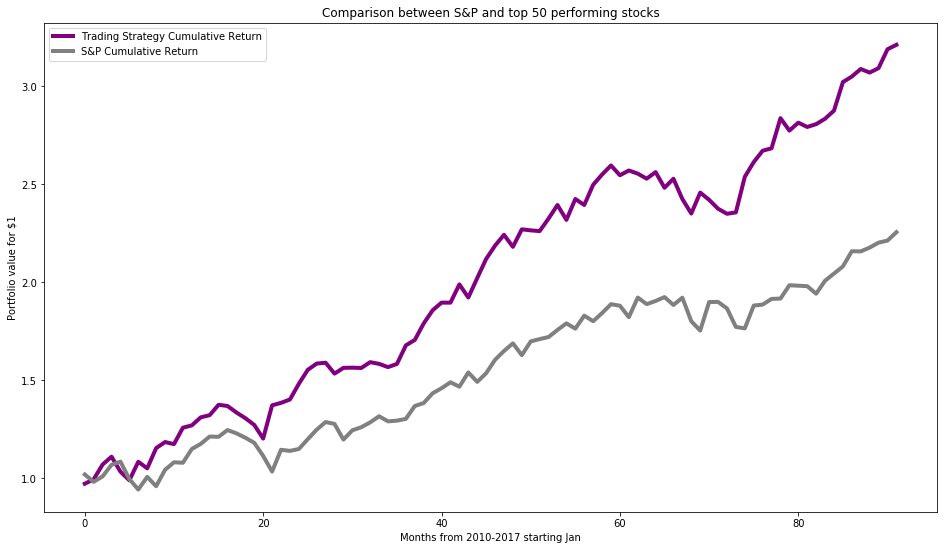

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(ret, label = 'Trading Strategy Cumulative Return', linewidth = 4, color = 'purple')
ax.plot(retSP, label = 'S&P Cumulative Return', linewidth = 4, color = 'grey')
plt.xlabel('Months from 2010-2017 starting Jan')
plt.ylabel('Portfolio value for $1')
plt.title('Comparison between S&P and top 50 performing stocks')
plt.legend(loc='best')
plt.legend()
plt.show()

#### Starting with a capital of 1,000,000 dollars we end up with 3211220.87 dollars after 7 years. So as compared to the S&P 500 index which gives us a final portfolio of 2,254,684.55 dollars our strategy using the Hidden Markov Model gives us a final portfolio of 3211220.87 dollars i.e. 96% more return.